                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression      0.95       0.05    0.87      0.10
1        Random Forest      1.00       0.94    0.79      0.86
2              XGBoost      0.97       0.75    0.80      0.77


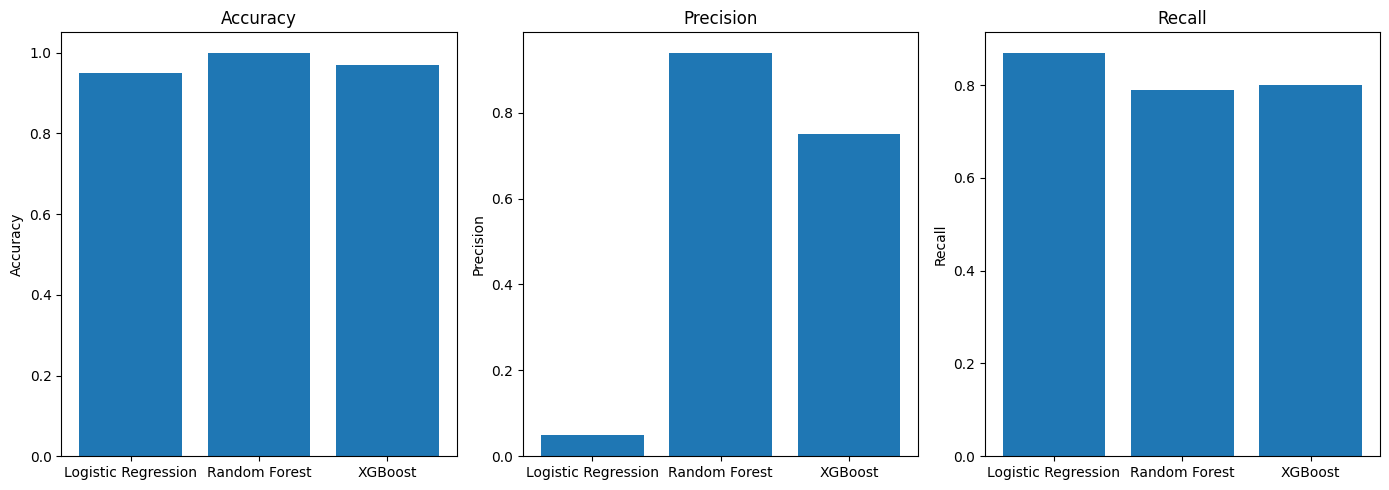

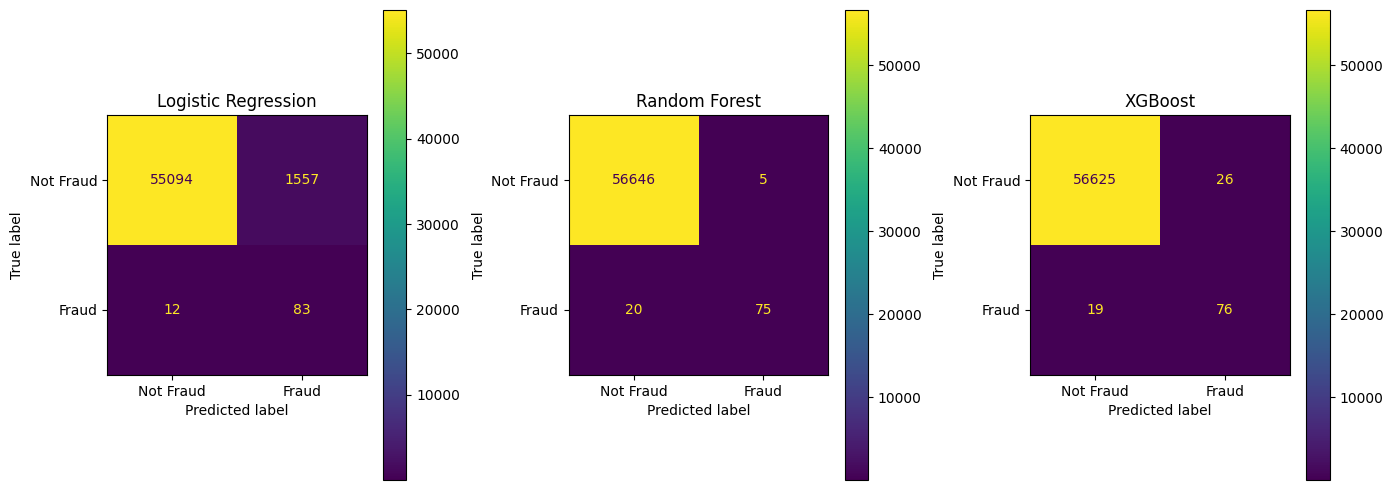

In [1]:
#Loading the saved predictions for evaluation
import pandas as pd
predictions_df = pd.read_csv('../data/processed/model_predictions.csv')
y_test = predictions_df['y_test'].values
y_pred_logistic = predictions_df['y_pred_logistic'].values
y_pred_rf = predictions_df['y_pred_rf'].values
y_pred_xgb = predictions_df['y_pred_xgb'].values

#Summary table of all three metrics for all three models
import pandas as pd
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.95, 1.0, 0.97],
    "Precision": [0.05, 0.94, 0.75],
    "Recall": [0.87, 0.79, 0.80],
    "F1 Score": [0.10, 0.86, 0.77]
})
print(metrics_df)
#Visualization of the metrics, 3 graphs, one for each metric, with the three models on the x-axis and the metric values on the y-axis
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
models = metrics_df["Model"]
accuracy = metrics_df["Accuracy"]
precision = metrics_df["Precision"]
recall = metrics_df["Recall"]
f1_score = metrics_df["F1 Score"]

axs[0].bar(models, accuracy)
axs[0].set_title("Accuracy")
axs[0].set_ylabel("Accuracy")

axs[1].bar(models, precision)
axs[1].set_title("Precision")
axs[1].set_ylabel("Precision")

axs[2].bar(models, recall)
axs[2].set_title("Recall")
axs[2].set_ylabel("Recall")

plt.tight_layout()
plt.show()
#Confusion matrix visualization for each model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
cm_lr = confusion_matrix(y_test, y_pred_logistic)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Not Fraud", "Fraud"])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Not Fraud", "Fraud"])
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["Not Fraud", "Fraud"])
disp_lr.plot(ax=axs[0])
disp_rf.plot(ax=axs[1])
disp_xgb.plot(ax=axs[2])
axs[0].set_title("Logistic Regression")
axs[1].set_title("Random Forest")
axs[2].set_title("XGBoost")
plt.tight_layout()
plt.show()

The best one is Random Forest.